In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ds = pd.read_csv('datasets/Davis.csv', index_col=[0])
ds.head()

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [3]:
len(ds)

200

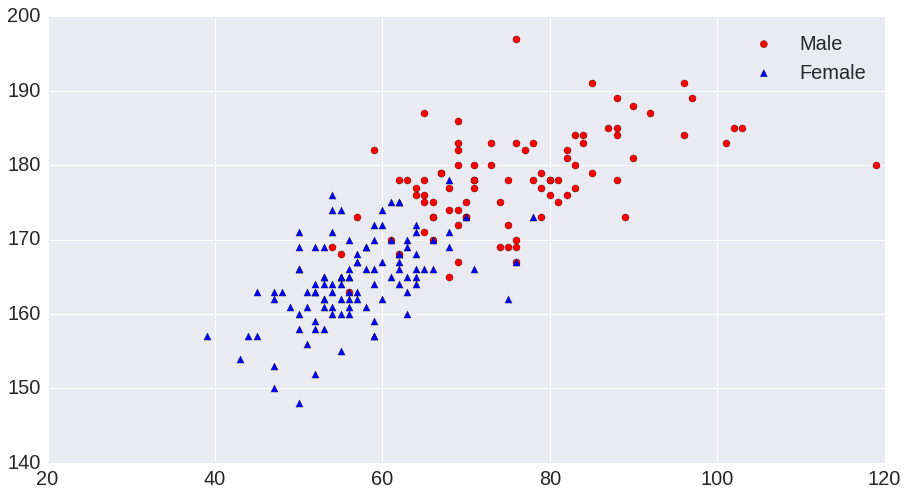

In [4]:
from sklearn.preprocessing import label_binarize

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
male = ds[ds['sex'] == 'M']
sns.set(font_scale=2)
plt.figure(figsize=(15,8))
plt.scatter(male['weight'], male['height'], c="red", label='Male', s=50)
female = ds[ds['sex'] == 'F']
plt.scatter(female['weight'], female['height'], c="blue", label='Female', s=50, marker='^')
plt.xlim((20, 120))
plt.ylim((140, 200))
plt.legend()
plt.savefig('weihgt_n_height.pdf')

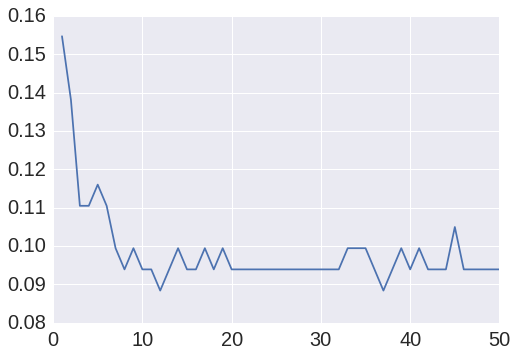

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import LeaveOneOut, cross_val_score
import numpy as np

loo = LeaveOneOut(len(ds.dropna()))

X = ds.dropna().drop(['sex'], axis=1).values
y = ds.dropna()['sex'].map(lambda x: {'M': 1, 'F': 0}[x])

X_scaled = StandardScaler().fit_transform(X)
max_k = 50
scores = np.zeros(max_k)

for k in range(1, max_k + 1):
    cls = KNeighborsClassifier(k)
    scores[k - 1] = cross_val_score(cls, X_scaled, y, cv=loo).mean()
    
plt.plot(range(1, max_k + 1), 1 - scores)